In [1]:
import torch
import numpy as np
from cmb_ps import CMBPS, get_camb_ps
import matplotlib.pyplot as plt

In [2]:
device = 0

In [3]:
def sample_prior(n):
    """
    Sample from the prior distribution.
    phi = (H0, Obh2) with H0 ~ U(50, 90), Omh2 ~ U(0.0075, 0.0567)
    """
    return (torch.tensor([40, 49.2e-3])*torch.rand(n, 2) + torch.tensor([50, 7.5e-3])).to(device)

ps_model = CMBPS().to(device)

In [4]:
phi_fid = torch.tensor([70, 32.1e-3]).to(device)
ps = ps_model(phi_fid).cpu().numpy()[0]
phi_fid = phi_fid.cpu().numpy()

ps_camb = get_camb_ps(phi_fid)

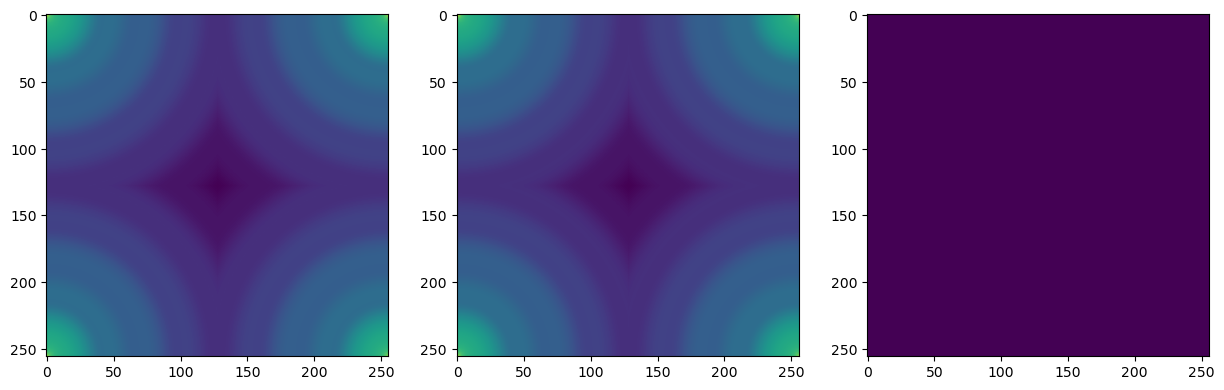

In [5]:
vmin, vmax = np.min(np.log(ps)), np.max(np.log(ps))
fig, axs = plt.subplots(1, 3, figsize=(15,5))
axs[0].imshow(np.log(ps), vmin=vmin, vmax=vmax)
axs[1].imshow(np.log(ps_camb), vmin=vmin, vmax=vmax)
axs[2].imshow(np.abs(np.log(ps) - np.log(ps_camb)), vmin=vmin, vmax=vmax)
plt.show()

In [6]:
phi = sample_prior(10)
ps = ps_model(phi).cpu().numpy()
phi = phi.cpu().numpy()

ps_camb = np.zeros_like(ps)
for i in range(ps.shape[0]):
    ps_camb[i] = get_camb_ps(phi[i])

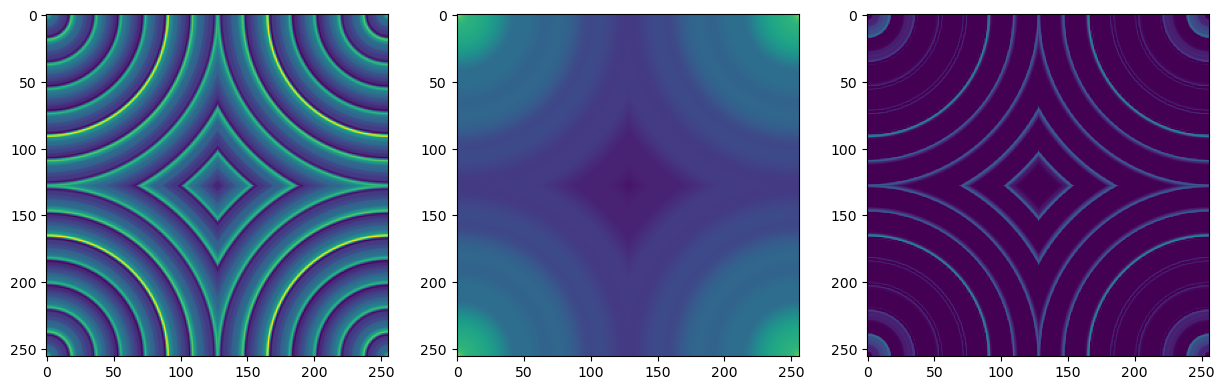

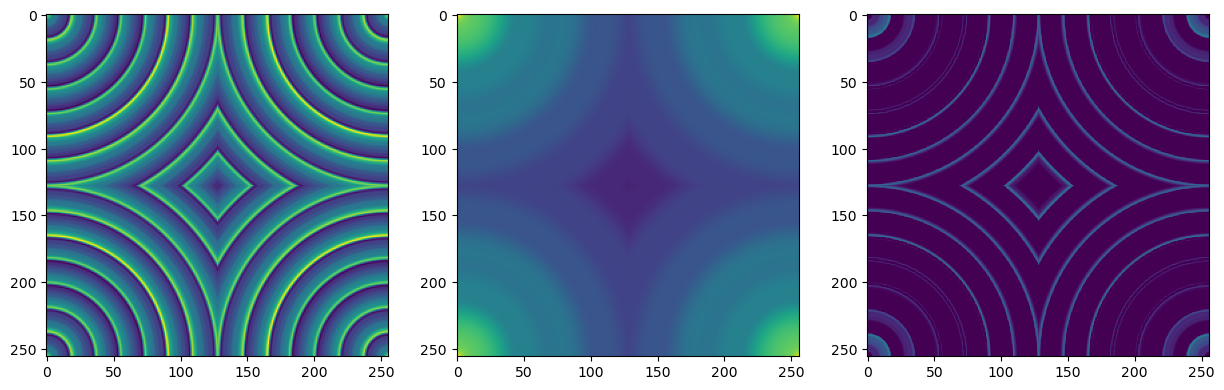

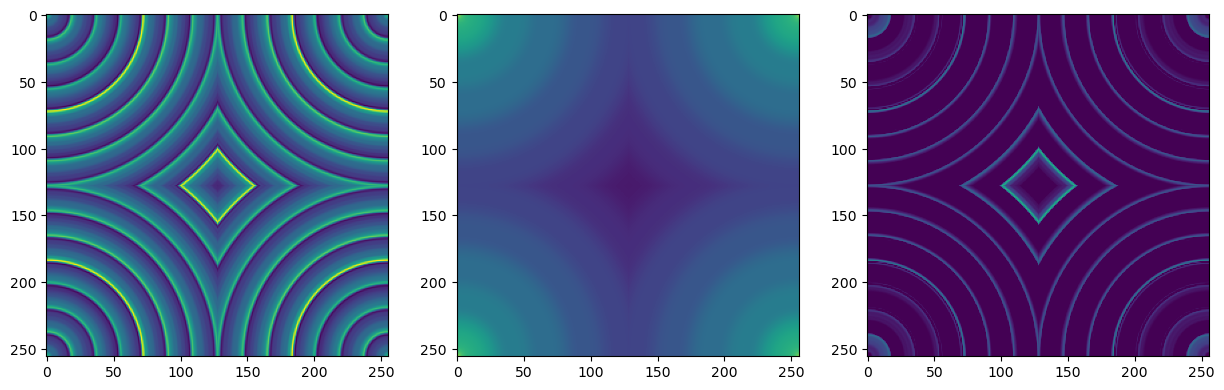

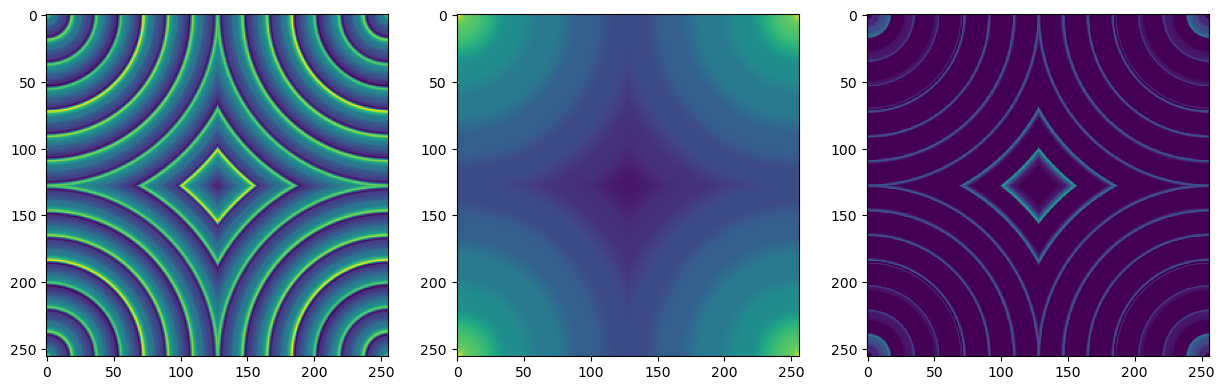

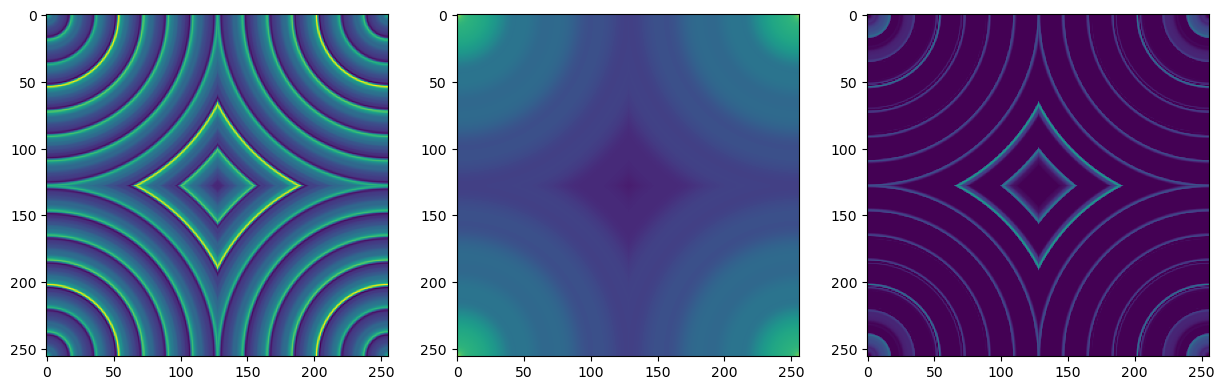

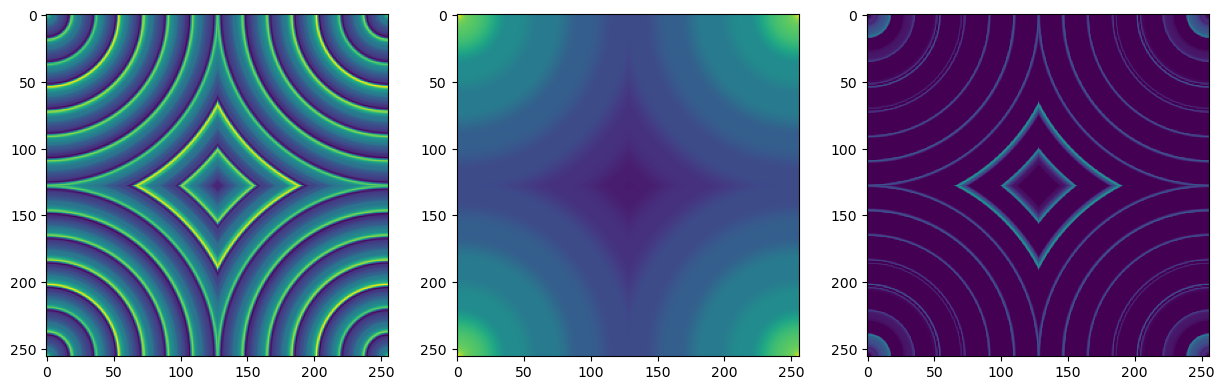

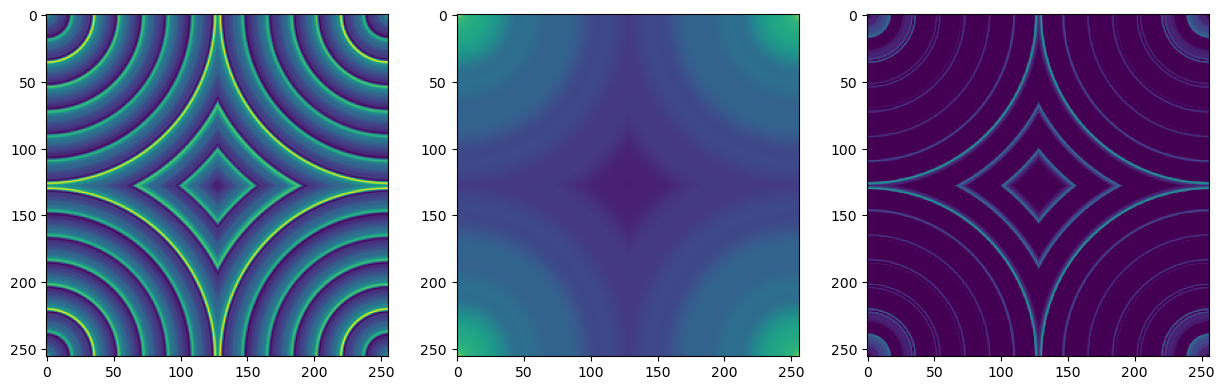

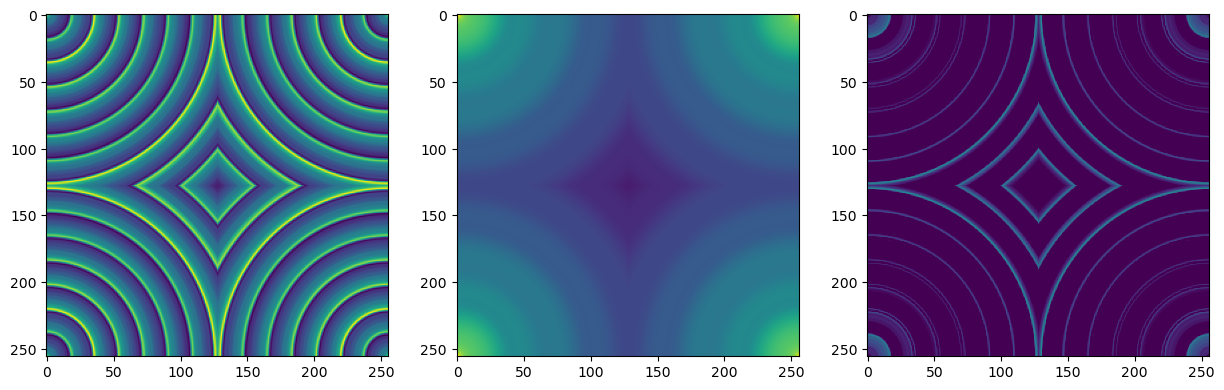

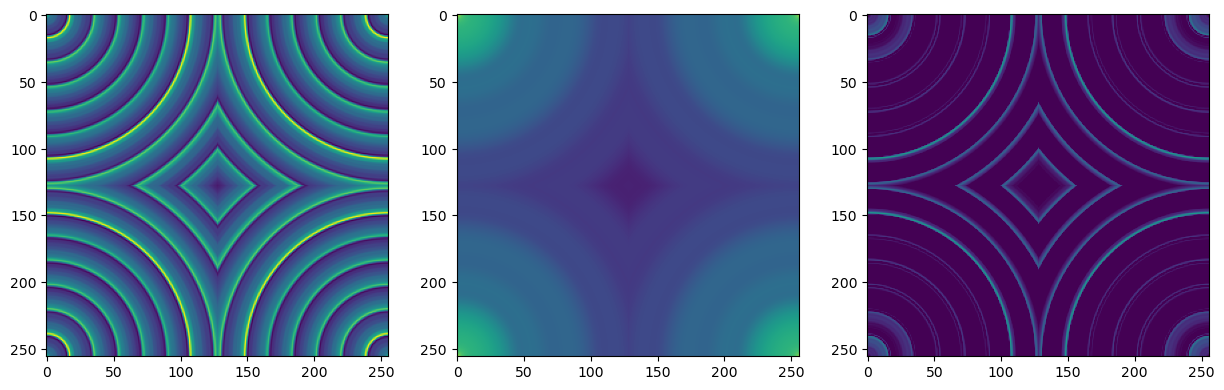

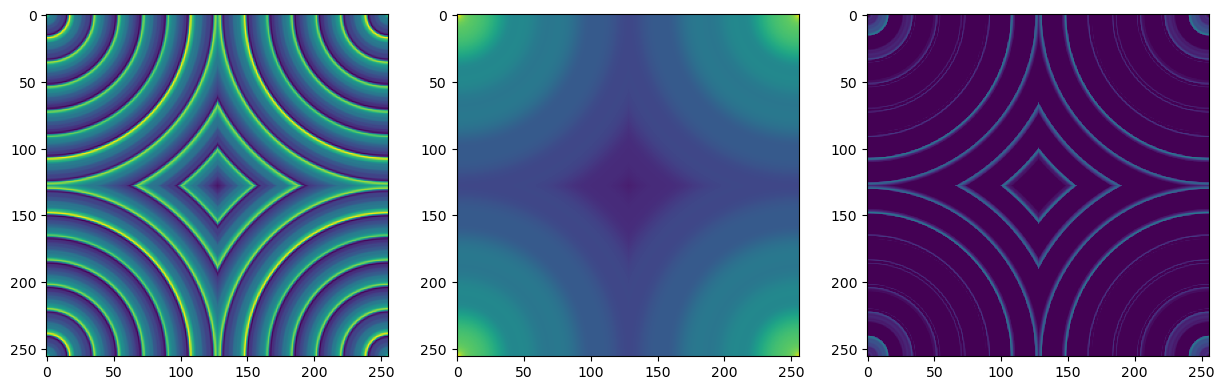

In [7]:
for i in range(ps.shape[0]):
    vmin, vmax = np.min(np.log(ps[i])), np.max(np.log(ps[i]))
    fig, axs = plt.subplots(1, 3, figsize=(15,5))
    axs[0].imshow(np.log(ps[i]), vmin=vmin, vmax=vmax)
    axs[1].imshow(np.log(ps_camb[i]), vmin=vmin, vmax=vmax)
    axs[2].imshow(np.abs(np.log(ps[i]) - np.log(ps_camb[i])), vmin=vmin, vmax=vmax)
    plt.show()